In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

###Download the dataset

In [29]:
housing = datasets.fetch_california_housing()

x_train_full, x_test, y_train_full, y_test = train_test_split(housing["data"],housing["target"])
x_train, x_val, y_train, y_val = train_test_split(x_train_full,y_train_full)

###Scale data

In [30]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

Sometimes it happens to create more complex structures, this is why functional APIs are important. An example o such network is "Wide & Deep" neural network published in 2016 from heng-tze Cheng.
Suppose we want that the input is connected directly to the output layer, but also that it is processed by the hidden layers, so the network can learn both the deep features and also the most simple one, like in the following picture.

![](https://www.researchgate.net/profile/Kaveh-Bastani/publication/328161216/figure/fig3/AS:679665219928064@1539056224036/Illustration-of-the-wide-and-deep-model-which-is-an-integration-of-wide-component-and.ppm)

nb: the inpute object is needed because later we might want multiple inputs

In [8]:
from keras.layers import Input, Dense, Concatenate

In [13]:
input = Input(shape = x_train.shape[1:])
hidden_1 = Dense(units = 30, activation = "relu")(input)
hidden_2 = Dense(units = 30, activation = "relu")(hidden_1)
concat = Concatenate()([input,hidden_2])
output = Dense(units = 1)(concat)
model = keras.Model(inputs = [input], outputs = [output])

In [14]:
model.compile(loss = "mean_squared_error", optimizer="sgd")

In [15]:
model.fit(x_train,y_train , validation_data= (x_val,y_val), epochs = 20)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7643 - val_loss: 0.7831
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3357 - val_loss: 9.6657
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 11/20
363/363 [==========================

In [16]:
model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: nan


nan

#Multiple Inputs
Sometimes it is possible to have multiple overlapping inputs. One part of the input follows the deep path, while the other the short path. Suppose in this example that we want 5 feature (from 0 to 4) follow the short path, and 6 features (2 to 7) follow the deep path.

In [64]:
input_A = Input(shape=[5])
input_B = Input(shape = [6])
hidden_1 = Dense(30,"relu")(input_B)
hidden_2 = Dense(30,"relu")(hidden_1)
concat = Concatenate()([input_A,hidden_2])
output = Dense(1)(concat)
model = keras.Model(inputs = [input_A,input_B], outputs = [output])

In [58]:
model.compile(optimizer = "sgd", loss= "mean_squared_error")

We we call fit() instead of passing a single matrix data, we should pass 2 matrices

In [59]:
x_train_A, x_train_B = x_train[:,:5],x_train[:,2:]
x_val_A, x_val_B = x_val[:,:5], x_val[:,2:]
x_test_A, x_test_B = x_test[:,:5], x_test[:,2:] 

In [60]:
history = model.fit((x_train_A, x_train_B), y_train, validation_data=((x_val_A,x_val_B), y_val), epochs=20)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8982 - val_loss: 3.5769
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5880 - val_loss: 0.4745
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4626 - val_loss: 0.4451
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4578 - val_loss: 0.4355
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4899 - val_loss: 0.4268
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4242 - val_loss: 0.4379
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4199 - val_loss: 0.4194
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4173 - val_loss: 0.4072
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4090 - val_loss: 0.4086
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3978 - val_loss: 0.4088

In [49]:
model.evaluate((x_test_A,x_test_B),y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3313


0.331320196390152

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

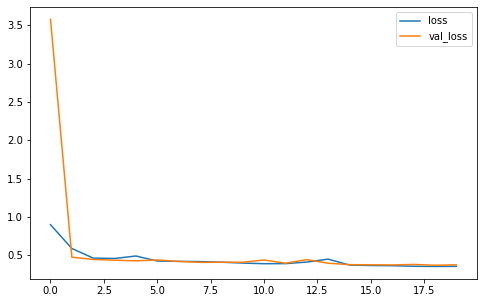

In [61]:
df = pd.DataFrame(history.history)
df.plot(figsize = (8,5))
plt.show()

#Multiple Outputs

There are so many cases in which you might want multiple outputs.


1.   It is demanded by the task
2.   You might have indipendent task based on the same data, instead of creating different NNs you can build a single one with multiple outputs
3.   You can use a second auxaliary output as regularization technique



In [80]:
input_A = Input(shape=[5])
input_B = Input(shape = [6])
hidden_1 = Dense(30,"relu")(input_B)
hidden_2 = Dense(30,"relu")(hidden_1)
concat = Concatenate()([input_A,hidden_2])
output = Dense(1, name = "output")(concat)
aux_output = Dense(1, name = "aux_output")(hidden_1)
model = keras.Model(inputs = [input_A,input_B], outputs = [output,aux_output])

In [81]:
x_train_A, x_train_B = x_train[:,:5],x_train[:,2:]
x_val_A, x_val_B = x_val[:,:5], x_val[:,2:]
x_test_A, x_test_B = x_test[:,:5], x_test[:,2:] 

Each output has its own losso function that we need to specify. Keras will compute all these losses and simply add them up to get the final loss.
If we want to use the aux_output just as a regularization technique, we can specify a certain wight, because we care more about the standard output.

In [82]:
model.compile(optimizer = "sgd", loss= ["mse","mse"], loss_weights=[0.9,0.1])

In [83]:
history = model.fit((x_train_A, x_train_B), (y_train,y_train), validation_data=((x_val_A,x_val_B), (y_val,y_val)), epochs=20)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2300 - output_loss: 1.0659 - aux_output_loss: 2.7069 - val_loss: 0.8252 - val_output_loss: 0.7447 - val_aux_output_loss: 1.5503
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6125 - output_loss: 0.5272 - aux_output_loss: 1.3805 - val_loss: 1.4404 - val_output_loss: 1.4582 - val_aux_output_loss: 1.2805
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5449 - output_loss: 0.4716 - aux_output_loss: 1.2049 - val_loss: 0.5252 - val_output_loss: 0.4583 - val_aux_output_loss: 1.1278
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5056 - output_loss: 0.4407 - aux_output_loss: 1.0897 - val_loss: 0.5552 - val_output_loss: 0.5008 - val_aux_output_loss: 1.0446
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4909 - output_loss: 0.4343 - aux_output_loss: 1.0007 - val_loss: 0.4754 - val_output_loss: 0.4204 - val_aux_

In [84]:
total_loss, main_loss, aux_loss = model.evaluate((x_test_A,x_test_B), (y_test,y_test))

162/162 [==============================] - 0s 1ms/step - loss: 0.3750 - output_loss: 0.3461 - aux_output_loss: 0.6353


In [85]:
import matplotlib.pyplot as plt
import pandas as pd

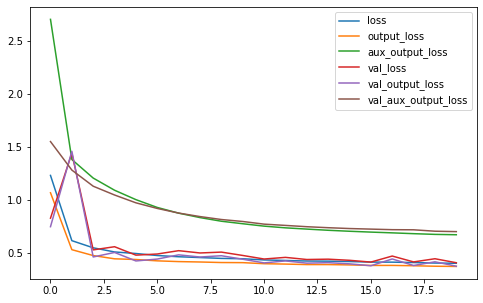

In [87]:
df = pd.DataFrame(history.history)
df.plot(figsize = (8,5))
plt.show()